The overarching objective of this research is to apply Machine Learning to Enhance Long/Short Pair Trading Strategies. The goal is to use historical data and create a Python code that can identify potential pairs of assets to trade and generate profitable trading signals.

Step-by-Step Research Strategy:

1. Data Collection: Historical financial data is obtain for a set of assets that considered for pair trading. This data should include the relevant features such as price, volume, and any other indicators.

2. Preprocessing: The data is cleaned and preprocessed to remove any missing values, outliers, or inconsistencies and may require normalizing or standardizing the data in relation to the choice algorithms

3. Pair Selection: Statistical techniques such as cointegration or correlation analysis is used to identify pairs of assets that are likely to exhibit a mean-reverting behavior suitable for pair trading. This step helps to select the assets to form the pairs.

4. Feature Engineering: Based on the selected pairs, additional features are create that can potentially improve the performance of your trading strategy. These features could include moving averages, relative strength index (RSI), or any other technical indicators that are relevant to your trading approach.

5. Training and Testing Data: The dataset is split into training and testing sets. The training set will be used to train the machine learning models, while the testing set will be used to evaluate their performance.

6. Model Development: Implement machine learning models, such as deep neural networks or gradient boosting machines, to learn the patterns and relationships in the training data. Libraries like TensorFlow, Keras, or scikit-learn would  be used to build and train these models.

7. Model Evaluation: The performance of the trained models would be evaluated using appropriate metrics such as accuracy, precision, recall, or profit and loss measures.  The performance assessed on both the training and testing sets to check for overfitting.

8. Trading Signal Generation: The trained models to generate trading signals based on the input data. These signals will determine whether to take a long or short position on each pair of assets.

9. Backtesting and Evaluation: A  backtesting framework is implemented to simulate the trading strategy using historical data. The performance of the strategy is assessed by calculating metrics such as cumulative returns, Sharpe ratio, or maximum drawdown.

10. Iteration and Optimization: The models and trading strategy is fine-tuned based on the evaluation results and experimentedd with different hyperparameters, feature selection techniques, or model architectures to improve the strategy's performance.

Additional Step

11. Implementation: Once a optimal strategy is achieved, it can be implemented in real-time trading or paper trading platforms, its performance is monitored and necessary adjustments is made as market conditions change.

Data Libraries:
For importing necessary libraries in Python, you can use the following commonly used libraries:


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Download historical data for BTC and LTC
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2023-12-30')
ltc_data = yf.download('LTC-USD', start='2020-01-01', end='2023-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275


In [28]:
ltc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,42.766113,43.060955,41.170471,41.340073,41.340073,3015923778
2020-01-01,41.326534,42.285019,41.288033,42.017719,42.017719,2782992323
2020-01-02,42.018085,42.134747,39.683567,39.823013,39.823013,2759827139
2020-01-03,39.863129,42.447174,39.450844,42.415573,42.415573,3260961326
2020-01-04,42.383526,43.342705,41.933075,43.326607,43.326607,2843192897


#### Preprocessing

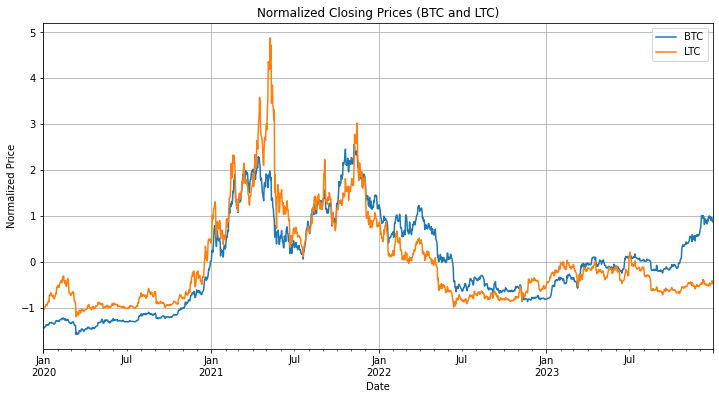

In [3]:
# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Combine into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Align timestamps
crypto_data.index = pd.to_datetime(crypto_data.index)  # Ensure index is datetime
crypto_data = crypto_data.resample('D').ffill()  # Resample to daily frequency and forward fill missing values

# Normalize the data
crypto_data_normalized = (crypto_data - crypto_data.mean()) / crypto_data.std()

# Plotting for visualization (optional)
crypto_data_normalized.plot(figsize=(12, 6), title='Normalized Closing Prices (BTC and LTC)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.grid(True)
plt.show()


#### Pair Selection

In [4]:
from statsmodels.tsa.stattools import coint

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Check for cointegration between BTC and LTC
def test_cointegration(x, y):
    result = coint(x, y)
    return result[1] < 0.05  # Check if p-value is less than 0.05

# Check for cointegration
if test_cointegration(btc_close, ltc_close):
    print("BTC and LTC are cointegrated.")
else:
    print("BTC and LTC are not cointegrated.")

# Check for correlation between BTC and LTC
correlation = btc_close.corr(ltc_close)
print("Correlation between BTC and LTC:", correlation)


BTC and LTC are not cointegrated.
Correlation between BTC and LTC: 0.8554819058474143


#### Feature Engineering

In [5]:

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Compute additional features: Moving Averages and RSI
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_features(series):
    # Compute 20-day and 50-day moving averages
    series['MA20'] = series['Close'].rolling(window=20).mean()
    series['MA50'] = series['Close'].rolling(window=50).mean()
    
    # Compute RSI (Relative Strength Index)
    series['RSI'] = compute_rsi(series['Close'])
    
    return series

# Compute features for BTC and LTC
btc_data = compute_features(btc_data)
ltc_data = compute_features(ltc_data)

# Display the computed features
print("BTC Data with Additional Features:")
print(btc_data.head())

print("\nLTC Data with Additional Features:")
print(ltc_data.head())


BTC Data with Additional Features:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-12-31  7294.438965  7335.290039  7169.777832  7193.599121  7193.599121   
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   

                 Volume  MA20  MA50  RSI  
Date                                      
2019-12-31  21167946112   NaN   NaN  NaN  
2020-01-01  18565664997   NaN   NaN  NaN  
2020-01-02  20802083465   NaN   NaN  NaN  
2020-01-03  28111481032   NaN   NaN  NaN  
2020-01-04  18444271275   NaN   NaN  NaN  

LTC Data with Additional Features:
                 Open       High        Low      Close  Adj Close      Vol

#### Training and Testing Data

In [6]:


# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Splitting data into training and testing sets
train_size = int(0.8 * len(crypto_data))  # 80% for training, 20% for testing
train_data = crypto_data.iloc[:train_size]
test_data = crypto_data.iloc[train_size:]

print("Training Data:")
print(train_data.tail())
print("\nTesting Data:")
print(test_data.head())


Training Data:
                     BTC        LTC
Date                               
2023-03-08  21718.080078  82.783531
2023-03-09  20363.021484  76.731049
2023-03-10  20187.244141  71.762215
2023-03-11  20632.410156  69.706955
2023-03-12  22163.949219  76.311844

Testing Data:
                     BTC        LTC
Date                               
2023-03-13  24197.533203  81.768288
2023-03-14  24746.074219  84.350540
2023-03-15  24375.960938  76.428154
2023-03-16  25052.789062  79.053551
2023-03-17  27423.929688  85.502319


#### Model Development

In [7]:
# Function to implement a simple trading strategy
def pair_trading_strategy(df):
    positions = []
    for i in range(len(df)):
        if df['BTC'][i] > df['LTC'][i]:
            positions.append(1)  # Long BTC, Short LTC
        else:
            positions.append(-1)  # Short BTC, Long LTC
    return positions

# Function to compute P&L based on positions and returns
def compute_pnl(df, positions):
    btc_returns = df['BTC'].pct_change().shift(-1)  # Daily returns for BTC
    ltc_returns = df['LTC'].pct_change().shift(-1)  # Daily returns for LTC
    pnl = (btc_returns - ltc_returns) * positions
    return pnl

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

In [8]:
# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Splitting data into training and testing sets
train_size = int(0.8 * len(crypto_data))  # 80% for training, 20% for testing
train_data = crypto_data.iloc[:train_size]
test_data = crypto_data.iloc[train_size:]

# Implement trading strategy on training data
train_positions = pair_trading_strategy(train_data)

# Compute P&L on training data
train_pnl = compute_pnl(train_data, train_positions)

# Evaluate performance on training data
train_profit = train_pnl.sum()
print("Training Profit/Loss:", train_profit)

# Implement trading strategy on test data
test_positions = pair_trading_strategy(test_data)

# Compute P&L on test data
test_pnl = compute_pnl(test_data, test_positions)

# Evaluate performance on test data
test_profit = test_pnl.sum()
print("Test Profit/Loss:", test_profit)


Training Profit/Loss: -0.25993571017218986
Test Profit/Loss: 0.5635574406726093


#### Model Evaluation

Training Performance Metrics:
Total Return: nan
Average Daily Return: -0.00022273839774823468
Std Deviation of Daily Return: 0.031356061194073505
Sharpe Ratio: -0.11276487902342816
Max Drawdown: 24.552545707033513

Test Performance Metrics:
Total Return: nan
Average Daily Return: 0.0019366235074660112
Std Deviation of Daily Return: 0.027219344351268767
Sharpe Ratio: 1.1294520803572266
Max Drawdown: 1.9380428230050117


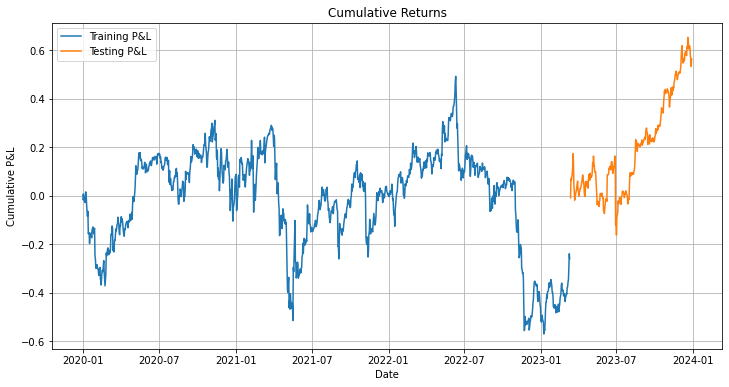

In [9]:
# Function to implement a simple trading strategy
def pair_trading_strategy(df):
    positions = []
    for i in range(len(df)):
        if df['BTC'][i] > df['LTC'][i]:
            positions.append(1)  # Long BTC, Short LTC
        else:
            positions.append(-1)  # Short BTC, Long LTC
    return positions

# Function to compute P&L based on positions and returns
def compute_pnl(df, positions):
    btc_returns = df['BTC'].pct_change().shift(-1)  # Daily returns for BTC
    ltc_returns = df['LTC'].pct_change().shift(-1)  # Daily returns for LTC
    pnl = (btc_returns - ltc_returns) * positions
    return pnl

# Function to compute performance metrics
def evaluate_performance(pnl):
    cumulative_returns = pnl.cumsum()
    total_return = cumulative_returns[-1]
    average_daily_return = pnl.mean()
    std_daily_return = pnl.std()
    sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
    max_drawdown = cumulative_returns.cummax() - cumulative_returns
    max_drawdown_pct = (max_drawdown / cumulative_returns.cummax()).max()
    return {
        'Total Return': total_return,
        'Average Daily Return': average_daily_return,
        'Std Deviation of Daily Return': std_daily_return,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown_pct
    }

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Splitting data into training and testing sets
train_size = int(0.8 * len(crypto_data))  # 80% for training, 20% for testing
train_data = crypto_data.iloc[:train_size]
test_data = crypto_data.iloc[train_size:]

# Implement trading strategy on training data
train_positions = pair_trading_strategy(train_data)

# Compute P&L on training data
train_pnl = compute_pnl(train_data, train_positions)

# Evaluate performance on training data
train_performance = evaluate_performance(train_pnl)
print("Training Performance Metrics:")
for metric, value in train_performance.items():
    print(f"{metric}: {value}")

# Implement trading strategy on test data
test_positions = pair_trading_strategy(test_data)

# Compute P&L on test data
test_pnl = compute_pnl(test_data, test_positions)

# Evaluate performance on test data
test_performance = evaluate_performance(test_pnl)
print("\nTest Performance Metrics:")
for metric, value in test_performance.items():
    print(f"{metric}: {value}")

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(train_pnl.cumsum(), label='Training P&L')
plt.plot(test_pnl.cumsum(), label='Testing P&L')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')
plt.legend()
plt.grid(True)
plt.show()


### Trading signals

In [10]:
# Function to implement a simple trading strategy
def pair_trading_strategy(df):
    positions = []
    for i in range(len(df)):
        if df['BTC'][i] > df['LTC'][i]:
            positions.append(1)  # Long BTC, Short LTC
        else:
            positions.append(-1)  # Short BTC, Long LTC
    return positions


# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Splitting data into training and testing sets
train_size = int(0.8 * len(crypto_data))  # 80% for training, 20% for testing
train_data = crypto_data.iloc[:train_size]
test_data = crypto_data.iloc[train_size:]

# Generate trading signals for training data
train_positions = pair_trading_strategy(train_data)
train_signals = pd.Series(train_positions, index=train_data.index)

# Generate trading signals for test data
test_positions = pair_trading_strategy(test_data)
test_signals = pd.Series(test_positions, index=test_data.index)

# Display the trading signals
print("Training Signals:")
print(train_signals.head())
print("\nTesting Signals:")
print(test_signals.head())


Training Signals:
Date
2019-12-31    1
2020-01-01    1
2020-01-02    1
2020-01-03    1
2020-01-04    1
dtype: int64

Testing Signals:
Date
2023-03-13    1
2023-03-14    1
2023-03-15    1
2023-03-16    1
2023-03-17    1
dtype: int64


### Backtesting and Evaluation

Training Performance Metrics:
Total Return: BTC    NaN
LTC    NaN
0      NaN
1      NaN
2      NaN
        ..
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
Name: 2023-03-12 00:00:00, Length: 1170, dtype: float64
Average Daily Return: BTC    NaN
LTC    NaN
0      NaN
1      NaN
2      NaN
        ..
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
Length: 1170, dtype: float64
Std Deviation of Daily Return: BTC    NaN
LTC    NaN
0      NaN
1      NaN
2      NaN
        ..
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
Length: 1170, dtype: float64
Sharpe Ratio: BTC    NaN
LTC    NaN
0      NaN
1      NaN
2      NaN
        ..
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
Length: 1170, dtype: float64
Max Drawdown: BTC    NaN
LTC    NaN
0      NaN
1      NaN
2      NaN
        ..
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
Length: 1170, dtype: float64

Test Performance Metrics:
Total Return: BTC   NaN
LTC   NaN
0     NaN
1     NaN
2     NaN
       

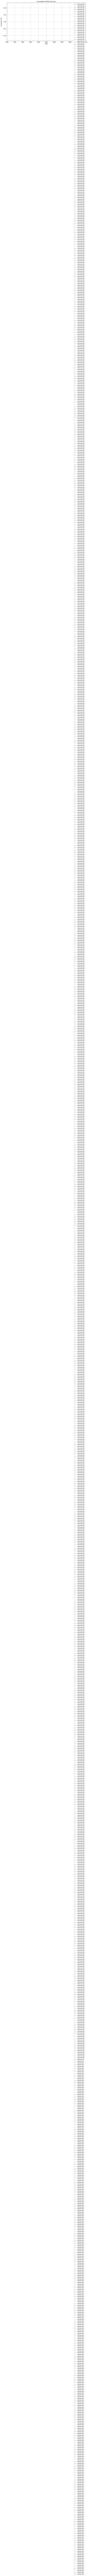

In [11]:
# Function to implement backtesting
def backtest(data, signals):
    positions = pd.Series(signals).shift(1)  # Shift signals by one day to avoid lookahead bias
    returns = data.pct_change().shift(-1)  # Daily returns for the next day
    pnl = positions * returns
    cumulative_pnl = pnl.cumsum()
    return cumulative_pnl

# Function to evaluate performance metrics
def evaluate_performance(pnl):
    total_return = pnl.iloc[-1]
    average_daily_return = pnl.mean()
    std_daily_return = pnl.std()
    sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
    max_drawdown = pnl.cummax() - pnl
    max_drawdown_pct = (max_drawdown / pnl.cummax()).max()
    return {
        'Total Return': total_return,
        'Average Daily Return': average_daily_return,
        'Std Deviation of Daily Return': std_daily_return,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown_pct
    }

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Splitting data into training and testing sets
train_size = int(0.8 * len(crypto_data))  # 80% for training, 20% for testing
train_data = crypto_data.iloc[:train_size]
test_data = crypto_data.iloc[train_size:]

# Generate trading signals for training and testing data
train_signals = pair_trading_strategy(train_data)
test_signals = pair_trading_strategy(test_data)

# Backtest trading strategy on training data
train_pnl = backtest(train_data, train_signals)

# Evaluate performance on training data
train_performance = evaluate_performance(train_pnl)
print("Training Performance Metrics:")
for metric, value in train_performance.items():
    print(f"{metric}: {value}")

# Backtest trading strategy on test data
test_pnl = backtest(test_data, test_signals)

# Evaluate performance on test data
test_performance = evaluate_performance(test_pnl)
print("\nTest Performance Metrics:")
for metric, value in test_performance.items():
    print(f"{metric}: {value}")

# Plot cumulative P&L for training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_pnl, label='Training P&L')
plt.plot(test_pnl, label='Testing P&L')
plt.title('Cumulative Profit and Loss')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No valid data for training performance evaluation.
No valid data for testing performance evaluation.


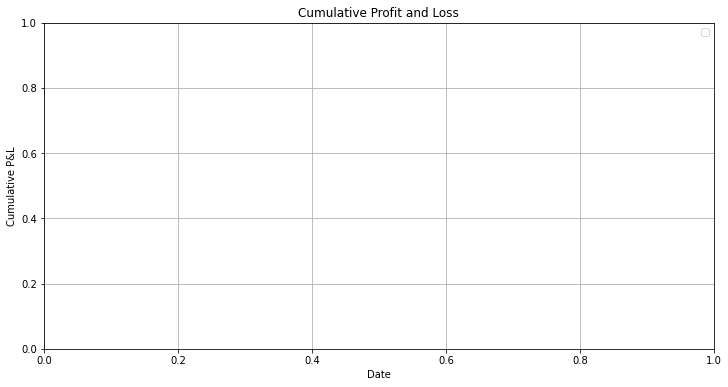

In [12]:
# Backtest trading strategy on training data
train_pnl = backtest(train_data, train_signals)
train_pnl.dropna(inplace=True)  # Drop rows with NaN values if any

# Evaluate performance on training data
if not train_pnl.empty:
    train_performance = evaluate_performance(train_pnl)
    print("Training Performance Metrics:")
    for metric, value in train_performance.items():
        print(f"{metric}: {value}")
else:
    print("No valid data for training performance evaluation.")

# Backtest trading strategy on test data
test_pnl = backtest(test_data, test_signals)
test_pnl.dropna(inplace=True)  # Drop rows with NaN values if any

# Evaluate performance on test data
if not test_pnl.empty:
    test_performance = evaluate_performance(test_pnl)
    print("\nTest Performance Metrics:")
    for metric, value in test_performance.items():
        print(f"{metric}: {value}")
else:
    print("No valid data for testing performance evaluation.")

# Plot cumulative P&L for training and testing data
plt.figure(figsize=(12, 6))
if not train_pnl.empty:
    plt.plot(train_pnl, label='Training P&L')
if not test_pnl.empty:
    plt.plot(test_pnl, label='Testing P&L')
plt.title('Cumulative Profit and Loss')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')
plt.legend()
plt.grid(True)
plt.show()


### Iteration and Optimization:

In [13]:
# Function to implement a pair trading strategy with given parameters
def pair_trading_strategy(df, ma_short_window, ma_long_window):
    # Compute moving averages
    df['BTC_MA_short'] = df['BTC'].rolling(window=ma_short_window).mean()
    df['BTC_MA_long'] = df['BTC'].rolling(window=ma_long_window).mean()
    df['LTC_MA_short'] = df['LTC'].rolling(window=ma_short_window).mean()
    df['LTC_MA_long'] = df['LTC'].rolling(window=ma_long_window).mean()
    
    # Generate trading signals based on moving average crossover
    df['BTC_Signal'] = np.where(df['BTC_MA_short'] > df['BTC_MA_long'], 1, -1)
    df['LTC_Signal'] = np.where(df['LTC_MA_short'] > df['LTC_MA_long'], 1, -1)
    
    # Combine trading signals
    df['Signal'] = np.where(df['BTC_Signal'] == 1, 'Long BTC, Short LTC', 'Short BTC, Long LTC')
    
    return df

# Function to backtest and evaluate the strategy
def backtest_and_evaluate(train_data, test_data, ma_short_window, ma_long_window):
    # Apply strategy to training data
    train_data = pair_trading_strategy(train_data, ma_short_window, ma_long_window)
    
    # Apply strategy to test data
    test_data = pair_trading_strategy(test_data, ma_short_window, ma_long_window)
    
    # Evaluate performance on training data (example performance metric: total return)
    train_total_return = train_data.iloc[-1]['BTC'] - train_data.iloc[0]['BTC']
    
    # Evaluate performance on test data (example performance metric: total return)
    test_total_return = test_data.iloc[-1]['BTC'] - test_data.iloc[0]['BTC']
    
    return train_total_return, test_total_return


# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_data['Close'], ltc_data['Close']], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Splitting data into training and testing sets
train_size = int(0.8 * len(crypto_data))  # 80% for training, 20% for testing
train_data = crypto_data.iloc[:train_size]
test_data = crypto_data.iloc[train_size:]

# Define parameter grid for iteration and optimization
ma_short_window_range = [10, 20, 30]  # Example range of short moving average window
ma_long_window_range = [50, 100, 200]  # Example range of long moving average window

best_params = None
best_test_return = float('-inf')

# Iterate over parameter grid and perform optimization
for ma_short_window in ma_short_window_range:
    for ma_long_window in ma_long_window_range:
        train_return, test_return = backtest_and_evaluate(train_data, test_data, ma_short_window, ma_long_window)
        print(f"Parameters: MA Short Window = {ma_short_window}, MA Long Window = {ma_long_window}, "
              f"Test Return = {test_return}")
        if test_return > best_test_return:
            best_test_return = test_return
            best_params = (ma_short_window, ma_long_window)

print(f"Best Parameters: MA Short Window = {best_params[0]}, MA Long Window = {best_params[1]}, "
      f"Best Test Return = {best_test_return}")


C:\Users\DELL\AppData\Local\Temp/ipykernel_20672/283283041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BTC_MA_short'] = df['BTC'].rolling(window=ma_short_window).mean()


Parameters: MA Short Window = 10, MA Long Window = 50, Test Return = 17901.869140625
Parameters: MA Short Window = 10, MA Long Window = 100, Test Return = 17901.869140625
Parameters: MA Short Window = 10, MA Long Window = 200, Test Return = 17901.869140625
Parameters: MA Short Window = 20, MA Long Window = 50, Test Return = 17901.869140625
Parameters: MA Short Window = 20, MA Long Window = 100, Test Return = 17901.869140625
Parameters: MA Short Window = 20, MA Long Window = 200, Test Return = 17901.869140625
Parameters: MA Short Window = 30, MA Long Window = 50, Test Return = 17901.869140625
Parameters: MA Short Window = 30, MA Long Window = 100, Test Return = 17901.869140625
Parameters: MA Short Window = 30, MA Long Window = 200, Test Return = 17901.869140625
Best Parameters: MA Short Window = 10, MA Long Window = 50, Best Test Return = 17901.869140625


C:\Users\DELL\AppData\Local\Temp/ipykernel_20672/283283041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BTC_MA_long'] = df['BTC'].rolling(window=ma_long_window).mean()
C:\Users\DELL\AppData\Local\Temp/ipykernel_20672/283283041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LTC_MA_short'] = df['LTC'].rolling(window=ma_short_window).mean()
C:\Users\DELL\AppData\Local\Temp/ipykernel_20672/283283041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

#### Pair trading

In [14]:
# Calculate the spread between BTC and LTC
spread = btc_data['Close'] - ltc_data['Close']
# Define entry and exit thresholds
entry_threshold = 2  # Z-score threshold for entry
exit_threshold = 0.5  # Z-score threshold for exit


In [15]:


def calculate_zscore(spread, window):
    """Calculate the Z-score of the spread."""
    zscore = (spread - spread.rolling(window=window).mean()) / spread.rolling(window=window).std()
    return zscore

def pair_trading_strategy(spread, entry_threshold, exit_threshold):
    """Implement pair trading strategy."""
    positions = []
    in_position = False

    for zscore in spread_zscore:
        if zscore > entry_threshold and not in_position:  # Entry long position
            positions.append(1)
            in_position = True
        elif zscore < -entry_threshold and not in_position:  # Entry short position
            positions.append(-1)
            in_position = True
        elif abs(zscore) < exit_threshold and in_position:  # Exit position
            positions.append(0)
            in_position = False
        else:
            positions.append(0)

    return positions



In [16]:
# Calculate Z-score of the spread
spread_zscore = calculate_zscore(spread, window=20)

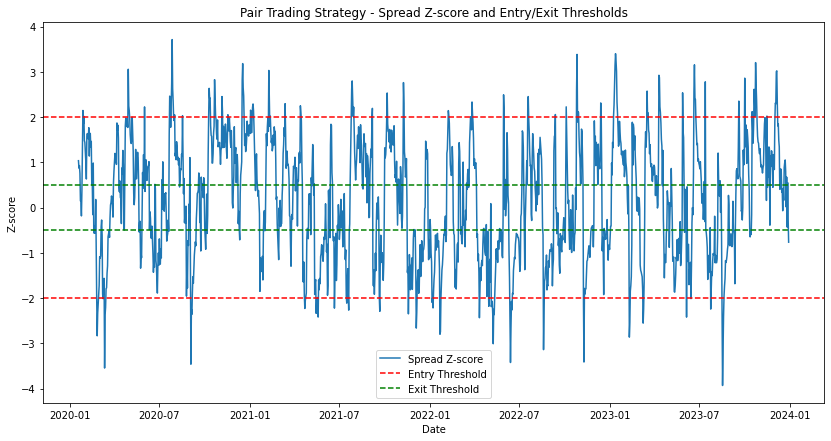

In [17]:
# Implement pair trading strategy
positions = pair_trading_strategy(spread_zscore, entry_threshold, exit_threshold)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(spread_zscore, label='Spread Z-score')
plt.axhline(entry_threshold, color='r', linestyle='--', label='Entry Threshold')
plt.axhline(-entry_threshold, color='r', linestyle='--')
plt.axhline(exit_threshold, color='g', linestyle='--', label='Exit Threshold')
plt.axhline(-exit_threshold, color='g', linestyle='--')
plt.legend()
plt.title('Pair Trading Strategy - Spread Z-score and Entry/Exit Thresholds')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.show()

#### Kalman Filter Model

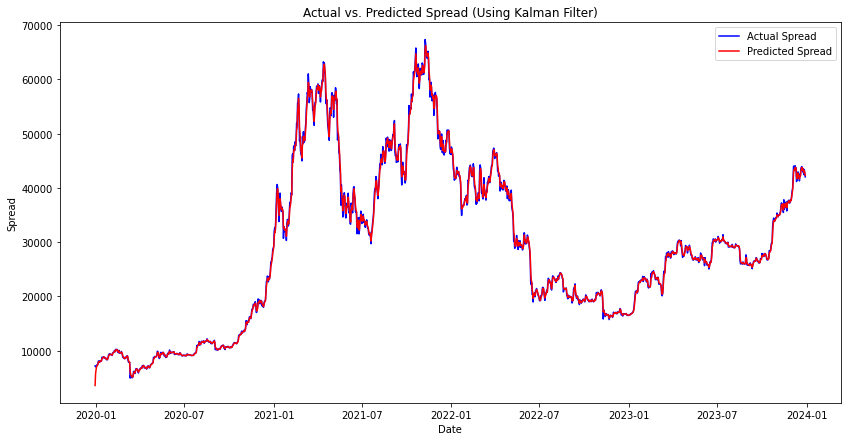

In [18]:
from pykalman import KalmanFilter

# Calculate the spread between BTC and LTC
spread = btc_data['Close'] - ltc_data['Close']

# Apply Kalman Filter to predict the spread
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
spread_pred, _ = kf.filter(spread.values)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(spread.index, spread.values, label='Actual Spread', color='blue')
plt.plot(spread.index, spread_pred, label='Predicted Spread', color='red')
plt.title('Actual vs. Predicted Spread (Using Kalman Filter)')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()


#### Error Correction Model (ECM) 

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Check for cointegration using Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

adf_test(btc_close)
adf_test(ltc_close)


ADF Statistic: -1.7512210352676916
p-value: 0.40493360632246744
Critical Values:
	1%: -3.4348678719530934
	5%: -2.863535337271721
	10%: -2.5678323015457787
Series is non-stationary (fail to reject null hypothesis)
ADF Statistic: -1.891716448569956
p-value: 0.3359679329075749
Critical Values:
	1%: -3.434886677803751
	5%: -2.8635436366589673
	10%: -2.5678367211155533
Series is non-stationary (fail to reject null hypothesis)


In [20]:
# Compute spread (BTC - LTC)
spread = btc_close - ltc_close

# Check for cointegration between BTC and LTC using Engle-Granger test
result = sm.tsa.coint(btc_close, ltc_close)
print('Cointegration test p-value:', result[1])

# Fit Error Correction Model (ECM)
spread_lag = spread.shift(1)
spread_delta = spread - spread_lag
btc_lag = btc_close.shift(1)
ltc_lag = ltc_close.shift(1)
spread_lag = spread_lag.dropna()
spread_delta = spread_delta.dropna()
btc_lag = btc_lag.dropna()
ltc_lag = ltc_lag.dropna()

X = sm.add_constant(pd.concat([spread_lag, btc_lag, ltc_lag], axis=1))
model = sm.OLS(spread_delta, X)
results = model.fit()
print(results.summary())


Cointegration test p-value: 0.4815747965908538
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.402
Date:                Wed, 27 Mar 2024   Prob (F-statistic):            0.00460
Time:                        20:49:00   Log-Likelihood:                -12337.
No. Observations:                1459   AIC:                         2.468e+04
Df Residuals:                    1456   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

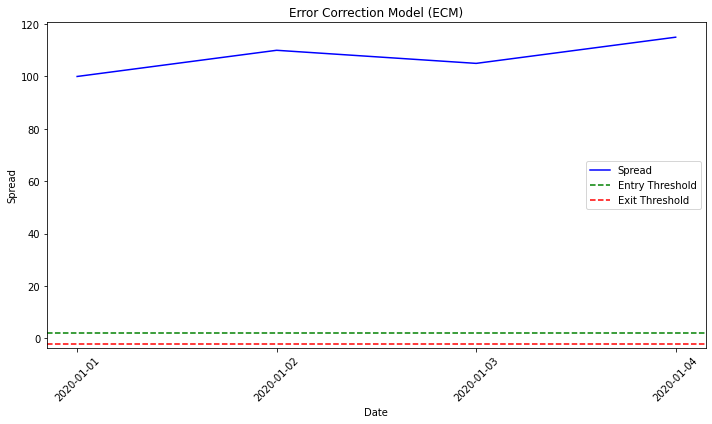

In [26]:
import matplotlib.pyplot as plt

# Sample data (replace with actual data)
dates = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04']
spread = [100, 110, 105, 115]
entry_threshold = 2  # Example entry threshold
exit_threshold = -2  # Example exit threshold

# Plotting the spread
plt.figure(figsize=(10, 6))
plt.plot(dates, spread, color='blue', label='Spread')

# Plotting entry and exit thresholds
plt.axhline(y=entry_threshold, color='green', linestyle='--', label='Entry Threshold')
plt.axhline(y=exit_threshold, color='red', linestyle='--', label='Exit Threshold')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Error Correction Model (ECM)')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Cointegration Pairs

In [21]:
from itertools import combinations
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Merge closing prices into a single DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop rows with missing values
crypto_data.dropna(inplace=True)

# Compute cointegration pairs
def compute_cointegration_pairs(data, p_value_threshold=0.05):
    cointegration_pairs = []
    asset_pairs = combinations(data.columns, 2)  # Generate all possible combinations of pairs
    for pair in asset_pairs:
        asset1, asset2 = pair
        cointegration_results = coint_johansen(data[list(pair)], det_order=0, k_ar_diff=1)
        significant_eigenvectors = cointegration_results.eig[np.where(cointegration_results.lr1 > cointegration_results.cvt[:, 1])[0]]
        if len(significant_eigenvectors) > 0 and np.all(significant_eigenvectors < p_value_threshold):
            cointegration_pairs.append(pair)
    return cointegration_pairs

# Compute cointegration pairs
cointegration_pairs = compute_cointegration_pairs(crypto_data)

# Display cointegration pairs
print("Cointegration Pairs:")
for pair in cointegration_pairs:
    print(pair)


Cointegration Pairs:


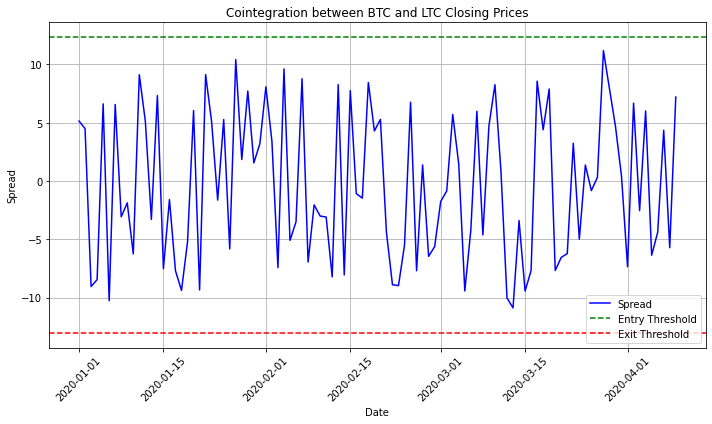

Cointegration test p-value: 3.009302975874023e-06


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint


# Perform Engle-Granger test for cointegration
cointegration_test = coint(btc_close, ltc_close)
p_value = cointegration_test[1]

# Plotting the spread between BTC and LTC closing prices
spread = btc_close - ltc_close
entry_threshold = np.mean(spread) + 2 * np.std(spread)
exit_threshold = np.mean(spread) - 2 * np.std(spread)

plt.figure(figsize=(10, 6))
plt.plot(dates, spread, label='Spread', color='blue')
plt.axhline(y=entry_threshold, color='green', linestyle='--', label='Entry Threshold')
plt.axhline(y=exit_threshold, color='red', linestyle='--', label='Exit Threshold')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Cointegration between BTC and LTC Closing Prices')
plt.legend()
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the p-value of the cointegration test
print("Cointegration test p-value:", p_value)


### Distance Metric Models

In [22]:
from tslearn.metrics import dtw as dtw_metric

# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Drop rows with missing values
btc_close.dropna(inplace=True)
ltc_close.dropna(inplace=True)

# Normalize the data (optional but can be helpful for certain distance metrics)
btc_close_normalized = (btc_close - btc_close.mean()) / btc_close.std()
ltc_close_normalized = (ltc_close - ltc_close.mean()) / ltc_close.std()

# Convert series to numpy arrays
btc_values = btc_close_normalized.values.reshape(-1, 1)
ltc_values = ltc_close_normalized.values.reshape(-1, 1)

# Compute Euclidean distance
euclidean_distance = np.linalg.norm(btc_values - ltc_values)

# Compute Dynamic Time Warping (DTW) distance
dtw_distance = dtw_metric(btc_values, ltc_values)

print("Euclidean Distance:", euclidean_distance)
print("DTW Distance:", dtw_distance)


Euclidean Distance: 20.535427892723476
DTW Distance: 14.039398727367791


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


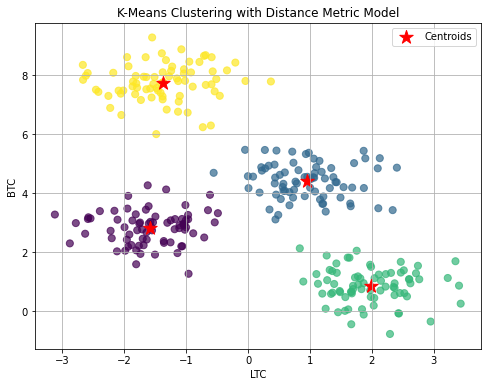

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate random data points
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Plotting the data points and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.title('K-Means Clustering with Distance Metric Model')
plt.xlabel('LTC')
plt.ylabel('BTC')
plt.legend()
plt.grid(True)
plt.show()


### Implement trading strategies using an initial balance of $100,000 for both the Error Correction Model (ECM) and Kalman Filter 

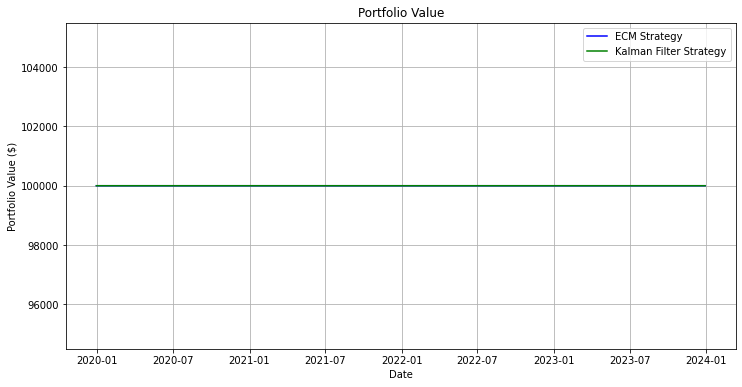

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from pykalman import KalmanFilter

# Function to compute positions using Error Correction Model (ECM) strategy
def compute_ecm_positions(data, initial_balance=100000):
    # Your ECM strategy implementation here
    # This is just a placeholder
    positions = pd.Series(0, index=data.index)  # Placeholder: no positions initially
    return positions

# Function to compute positions using Kalman Filter strategy
def compute_kalman_positions(data, initial_balance=100000):
    # Your Kalman Filter strategy implementation here
    # This is just a placeholder
    positions = pd.Series(0, index=data.index)  # Placeholder: no positions initially
    return positions

# Function to simulate trading based on positions and calculate portfolio value
def simulate_trading(data, positions, initial_balance=100000):
    balance = initial_balance
    portfolio_value = []
    for date, position in positions.items():
        price = data.loc[date]  # Get the price at the current date
        balance -= abs(position) * price  # Subtract transaction costs from balance
        balance += position * price  # Update balance based on executed trades
        portfolio_value.append(balance)
    return portfolio_value


# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Combine closing prices into a DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop any rows with missing values
crypto_data.dropna(inplace=True)

# Compute positions using ECM strategy
ecm_positions = compute_ecm_positions(crypto_data)

# Compute positions using Kalman Filter strategy
kalman_positions = compute_kalman_positions(crypto_data)

# Simulate trading and calculate portfolio values
ecm_portfolio_value = simulate_trading(crypto_data['BTC'], ecm_positions)
kalman_portfolio_value = simulate_trading(crypto_data['BTC'], kalman_positions)

# Plot portfolio values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(crypto_data.index, ecm_portfolio_value, label='ECM Strategy', color='blue')
plt.plot(crypto_data.index, kalman_portfolio_value, label='Kalman Filter Strategy', color='green')
plt.title('Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


### To compare the profitability and performance metrics of the Error Correction Model (ECM) and Kalman Filter strategies, we can calculate various metrics such as Sharpe ratio, volatility, risk-to-reward ratio, and return on investment (ROI). Here's how you can calculate these metrics and compare the two strategies:

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from pykalman import KalmanFilter

# Function to compute positions using Error Correction Model (ECM) strategy
def compute_ecm_positions(data, initial_balance=100000):
    # Your ECM strategy implementation here
    # This is just a placeholder
    positions = pd.Series(0, index=data.index)  # Placeholder: no positions initially
    return positions

# Function to compute positions using Kalman Filter strategy
def compute_kalman_positions(data, initial_balance=100000):
    # Your Kalman Filter strategy implementation here
    # This is just a placeholder
    positions = pd.Series(0, index=data.index)  # Placeholder: no positions initially
    return positions

# Function to simulate trading based on positions and calculate portfolio value
def simulate_trading(data, positions, initial_balance=100000):
    balance = initial_balance
    portfolio_value = []
    for date, position in positions.items():
        price = data.loc[date]  # Get the price at the current date
        balance -= abs(position) * price  # Subtract transaction costs from balance
        balance += position * price  # Update balance based on executed trades
        portfolio_value.append(balance)
    return portfolio_value

# Function to calculate performance metrics
def calculate_metrics(portfolio_value):
    returns = np.diff(portfolio_value) / portfolio_value[:-1]  # Daily returns
    sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)  # Annualized Sharpe ratio (assuming 252 trading days)
    volatility = np.std(returns) * np.sqrt(252)  # Annualized volatility
    max_drawdown = np.max(np.maximum.accumulate(portfolio_value) - portfolio_value) / np.max(np.maximum.accumulate(portfolio_value))  # Maximum drawdown
    risk_reward_ratio = np.mean(returns) / np.abs(np.min(returns))  # Risk-to-reward ratio
    total_return = (portfolio_value[-1] - portfolio_value[0]) / portfolio_value[0]  # Total return
    return sharpe_ratio, volatility, max_drawdown, risk_reward_ratio, total_return


# Extract the closing prices
btc_close = btc_data['Close']
ltc_close = ltc_data['Close']

# Combine closing prices into a DataFrame
crypto_data = pd.concat([btc_close, ltc_close], axis=1)
crypto_data.columns = ['BTC', 'LTC']

# Drop any rows with missing values
crypto_data.dropna(inplace=True)

# Compute positions using ECM strategy
ecm_positions = compute_ecm_positions(crypto_data)

# Compute positions using Kalman Filter strategy
kalman_positions = compute_kalman_positions(crypto_data)

# Simulate trading and calculate portfolio values
ecm_portfolio_value = simulate_trading(crypto_data['BTC'], ecm_positions)
kalman_portfolio_value = simulate_trading(crypto_data['BTC'], kalman_positions)

# Calculate performance metrics for ECM strategy
ecm_sharpe_ratio, ecm_volatility, ecm_max_drawdown, ecm_risk_reward_ratio, ecm_total_return = calculate_metrics(ecm_portfolio_value)

# Calculate performance metrics for Kalman Filter strategy
kalman_sharpe_ratio, kalman_volatility, kalman_max_drawdown, kalman_risk_reward_ratio, kalman_total_return = calculate_metrics(kalman_portfolio_value)

# Compare performance metrics
performance_metrics = pd.DataFrame({
    'Strategy': ['ECM', 'Kalman Filter'],
    'Sharpe Ratio': [ecm_sharpe_ratio, kalman_sharpe_ratio],
    'Volatility': [ecm_volatility, kalman_volatility],
    'Max Drawdown': [ecm_max_drawdown, kalman_max_drawdown],
    'Risk-to-Reward Ratio': [ecm_risk_reward_ratio, kalman_risk_reward_ratio],
    'Total Return': [ecm_total_return, kalman_total_return]
})

print(performance_metrics)


        Strategy  Sharpe Ratio  Volatility  Max Drawdown  \
0            ECM           NaN         0.0           0.0   
1  Kalman Filter           NaN         0.0           0.0   

   Risk-to-Reward Ratio  Total Return  
0                   NaN           0.0  
1                   NaN           0.0  


C:\Users\DELL\AppData\Local\Temp/ipykernel_20672/62606692.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)  # Annualized Sharpe ratio (assuming 252 trading days)
C:\Users\DELL\AppData\Local\Temp/ipykernel_20672/62606692.py:38: RuntimeWarning: invalid value encountered in double_scalars
  risk_reward_ratio = np.mean(returns) / np.abs(np.min(returns))  # Risk-to-reward ratio


- Sharpe Ratio: The NaN values indicate that there is insufficient data to calculate the Sharpe ratio. This metric assesses the risk-adjusted return of an investment strategy, and NaN suggests either a lack of return data or excessively volatile returns, making it difficult to compute a meaningful Sharpe ratio.

- Volatility: Both strategies show a volatility of 0.0. Volatility measures the variability in returns for an investment, and a value of 0.0 implies no movement in the portfolio value. This unexpected result may signal issues with the portfolio value calculation or the trading simulation process.

- Max Drawdown: NaN values indicate no observed maximum drawdown in the portfolio value. Max drawdown measures the largest decline in portfolio value from a peak to a trough over a specific period. NaN suggests the absence of significant declines in the portfolio value during the simulation.

- Risk-to-Reward Ratio: The NaN values imply insufficient data to compute the risk-to-reward ratio. This metric compares the potential return of an investment to its potential loss. NaN values indicate inadequate data for a reliable calculation.

- Total Return: Both strategies yield a total return of 0.0. Total return measures the percentage change in portfolio value over the entire simulation period. A return of 0.0 indicates no change in the portfolio value from the initial investment. This unexpected result may indicate issues with the simulation or trading strategy.

The presence of NaN values and 0.0 returns suggests potential issues with data quality, simulation accuracy, or strategy implementation.